In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "class 5 (77).bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding
_, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Perform morphological operations to remove noise
kernel = np.ones((5,5), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Keep only the two largest contours (assuming they are the lungs)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]

# Create a mask with the two lung regions
lung_mask = np.zeros_like(image)
cv2.drawContours(lung_mask, contours, -1, (255), thickness=cv2.FILLED)

# Apply the mask to the original image
lung_segmented = cv2.bitwise_and(image, image, mask=lung_mask)

# Display the results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,3,2), plt.imshow(lung_mask, cmap='gray'), plt.title('Lung Mask')
plt.subplot(1,3,3), plt.imshow(lung_segmented, cmap='gray'), plt.title('Segmented Lungs')
plt.show()


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\morph.dispatch.cpp:1163: error: (-215:Assertion failed) !_src.empty() in function 'cv::morphologyEx'


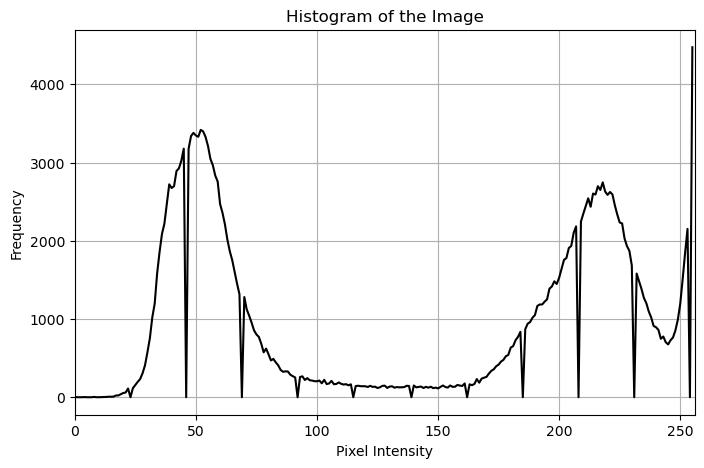

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\karth\min_max\Class 1  (48).bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error: Image not loaded. Check the file path!")
else:
    # Compute the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.figure(figsize=(8, 5))
    plt.plot(hist, color='black')
    plt.title("Histogram of the Image")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.xlim([0, 256])
    plt.grid()
    plt.show()


Computed Threshold Value: 135.0


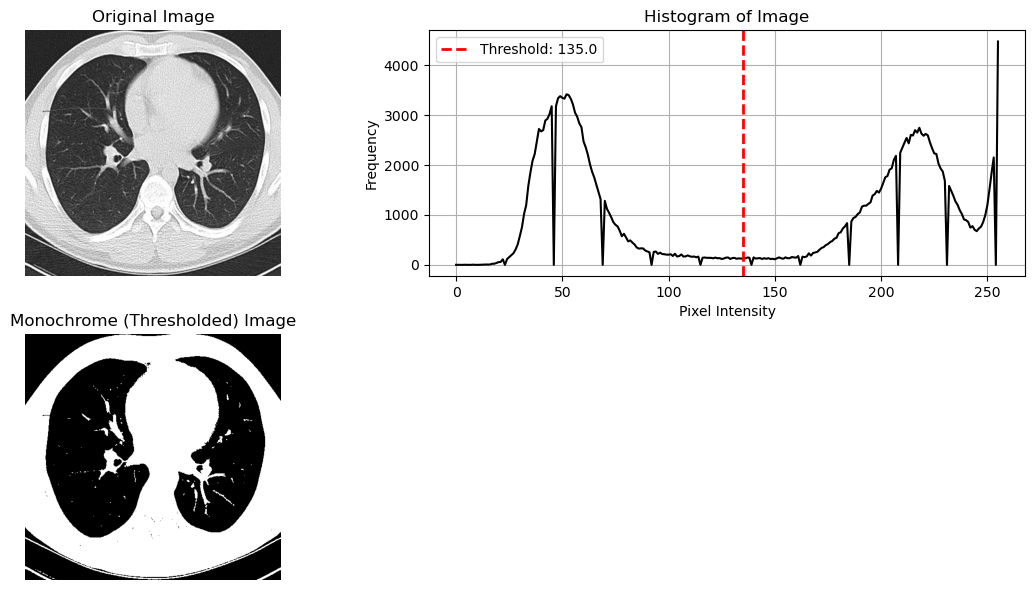

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = r"C:\Users\karth\min_max\Class 1  (48).bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded
if image is None:
    print("Error: Image not loaded. Check the file path!")
    exit()

# Compute the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Find the optimal threshold using Otsu's method
_, threshold_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display results
plt.figure(figsize=(12, 6))

# Show Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Show Histogram
plt.subplot(2, 2, 2)
plt.plot(hist, color='black')
plt.axvline(_, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {_}')
plt.title("Histogram of Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Show Threshold Value
print(f"Computed Threshold Value: {_}")

# Show Monochrome Image
plt.subplot(2, 2, 3)
plt.imshow(threshold_image, cmap='gray')
plt.title("Monochrome (Thresholded) Image")
plt.axis("off")

plt.tight_layout()
plt.show()


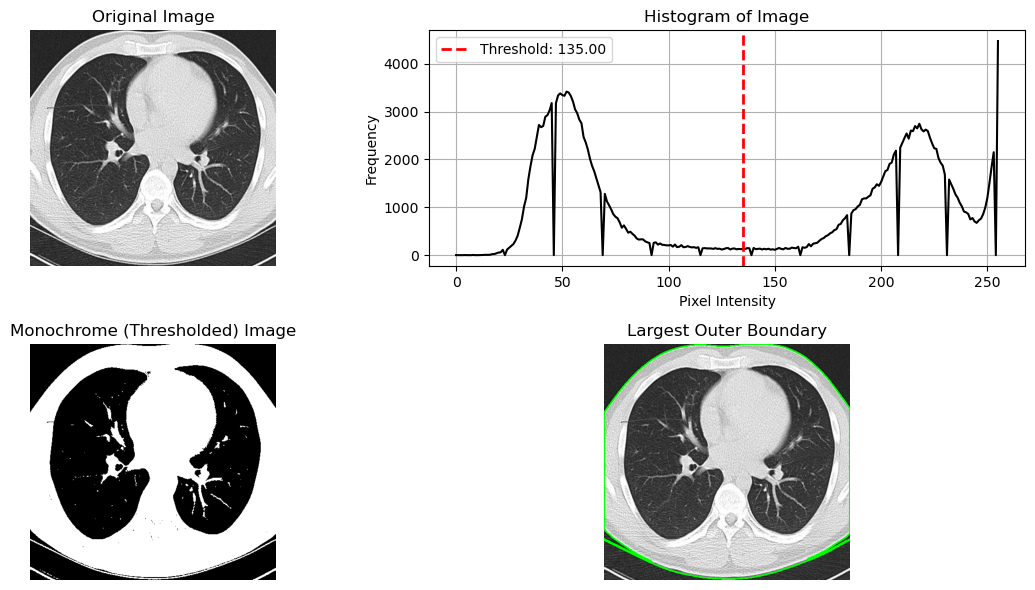

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = r"C:\Users\karth\min_max\Class 1  (48).bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded
if image is None:
    print("Error: Image not loaded. Check the file path!")
    exit()

# Compute the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Find the optimal threshold using Otsu's method
threshold_value, threshold_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours were found
if len(contours) == 0:
    print("No contours found!")
    exit()

# Find the largest contour (based on area)
largest_contour = max(contours, key=cv2.contourArea)

# Draw the largest contour on the original image (converted to BGR for color display)
image_with_contour = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contour, [largest_contour], -1, (0, 255, 0), 2)  # Green contour

# Display results
plt.figure(figsize=(12, 6))

# Show Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Show Histogram
plt.subplot(2, 2, 2)
plt.plot(hist, color='black')
plt.axvline(threshold_value, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold_value:.2f}')
plt.title("Histogram of Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Show Monochrome Image
plt.subplot(2, 2, 3)
plt.imshow(threshold_image, cmap='gray')
plt.title("Monochrome (Thresholded) Image")
plt.axis("off")

# Show Image with Largest Contour
plt.subplot(2, 2, 4)
plt.imshow(image_with_contour)
plt.title("Largest Outer Boundary")
plt.axis("off")

plt.tight_layout()
plt.show()


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Folder containing images
image_folder = r"C:\Users\karth\min_max\Class 1  (48).bmp"

# Ensure the folder exists
if not os.path.exists(image_folder):
    print("Error: Folder not found!")
    exit()

# Process each image in the folder
for filename in os.listdir(image_folder):
    if filename.endswith((".bmp", ".jpg", ".png")):  # Check for valid image formats
        image_path = os.path.join(image_folder, filename)

        # Load the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Error: Could not load image {filename}")
            continue

        # Compute the histogram of the original image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])

        # Find the optimal threshold using Otsu's method
        threshold_value, threshold_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find contours in the thresholded image
        contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if not contours:
            print(f"No contours found in {filename}")
            continue

        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Get bounding box around the contour
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        if w == 0 or h == 0:
            print(f"Skipping {filename}: Extracted region is too small!")
            continue

        # Create a mask for the largest contour
        mask = np.zeros_like(image)
        cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

        # Extract only the region inside the contour
        extracted_region = cv2.bitwise_and(image, image, mask=mask)

        # Crop the image to the bounding box
        cropped_extracted_region = extracted_region[y:y+h, x:x+w]

        # Compute histogram for the extracted region
        hist_extracted = cv2.calcHist([cropped_extracted_region], [0], None, [256], [0, 256])

        # Find threshold automatically for the extracted region using Otsu's method
        threshold_extracted_value, extracted_binary = cv2.threshold(
            cropped_extracted_region, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
        )

        # Display results
        plt.figure(figsize=(14, 7))

        # Show Original Image
        plt.subplot(2, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Original Image - {filename}")
        plt.axis("off")

        # Show Histogram of Original Image
        plt.subplot(2, 3, 2)
        plt.plot(hist, color='black')
        plt.axvline(threshold_value, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold_value:.2f}')
        plt.title("Histogram of Original Image")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True)

        # Show Monochrome Image of Original
        plt.subplot(2, 3, 3)
        plt.imshow(threshold_image, cmap='gray')
        plt.title("Monochrome Image (Original Thresholded)")
        plt.axis("off")

        # Show Extracted Region
        plt.subplot(2, 3, 4)
        plt.imshow(cropped_extracted_region, cmap='gray')
        plt.title("Extracted Largest Boundary Region")
        plt.axis("off")

        # Show Histogram of Extracted Region
        plt.subplot(2, 3, 5)
        plt.plot(hist_extracted, color='black')

        if hist_extracted is not None and len(hist_extracted) > 0:
            plt.axvline(threshold_extracted_value, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold_extracted_value:.2f}')

        plt.title("Histogram of Extracted Region")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True)

        # Show Binary Image of Extracted Region
        plt.subplot(2, 3, 6)
        plt.imshow(extracted_binary, cmap='gray')
        plt.title("Monochrome Image of Extracted Region")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

print("Batch processing complete!")


NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\karth\\min_max\\Class 1  (48).bmp'

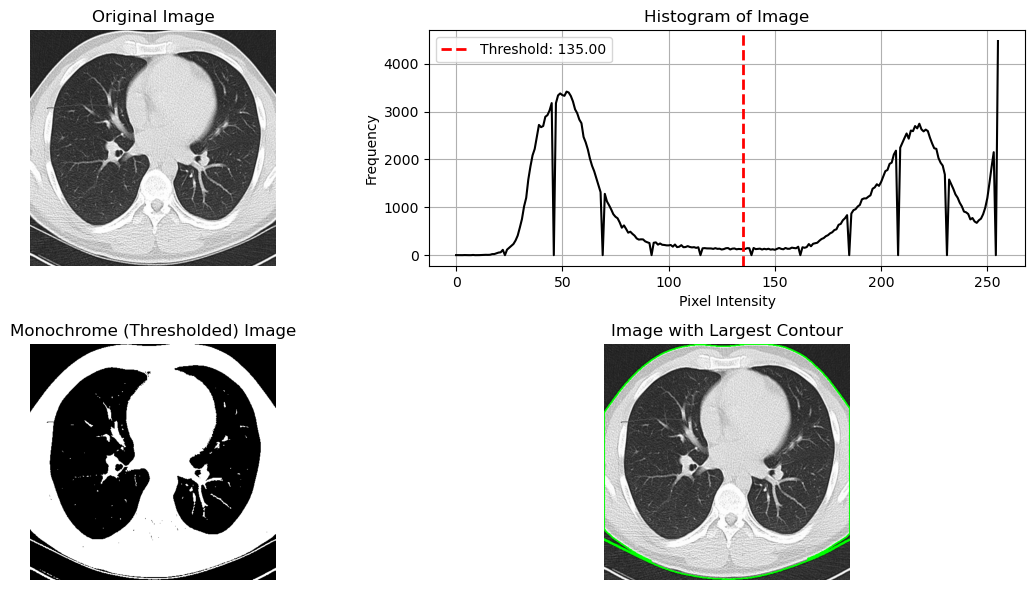

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = r"C:\Users\karth\min_max\Class 1  (48).bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if image is None:
    print("Error: Image not loaded. Check the file path!")
    exit()

# Compute histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Apply Otsu's thresholding
threshold_value, threshold_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours were found
if not contours:
    print("No contours found in the image!")
    exit()

# Find the largest contour (based on area)
largest_contour = max(contours, key=cv2.contourArea)

# Draw the largest contour on the original image (converted to BGR for color display)
image_with_contour = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contour, [largest_contour], -1, (0, 255, 0), 2)  # Green contour

# Display results
plt.figure(figsize=(12, 6))

# Show Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Show Histogram
plt.subplot(2, 2, 2)
plt.plot(hist, color='black')
plt.axvline(threshold_value, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold_value:.2f}')
plt.title("Histogram of Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# Show Monochrome Image
plt.subplot(2, 2, 3)
plt.imshow(threshold_image, cmap='gray')
plt.title("Monochrome (Thresholded) Image")
plt.axis("off")

# Show Image with Largest Contour
plt.subplot(2, 2, 4)
plt.imshow(image_with_contour)
plt.title("Image with Largest Contour")
plt.axis("off")

plt.tight_layout()
plt.show()


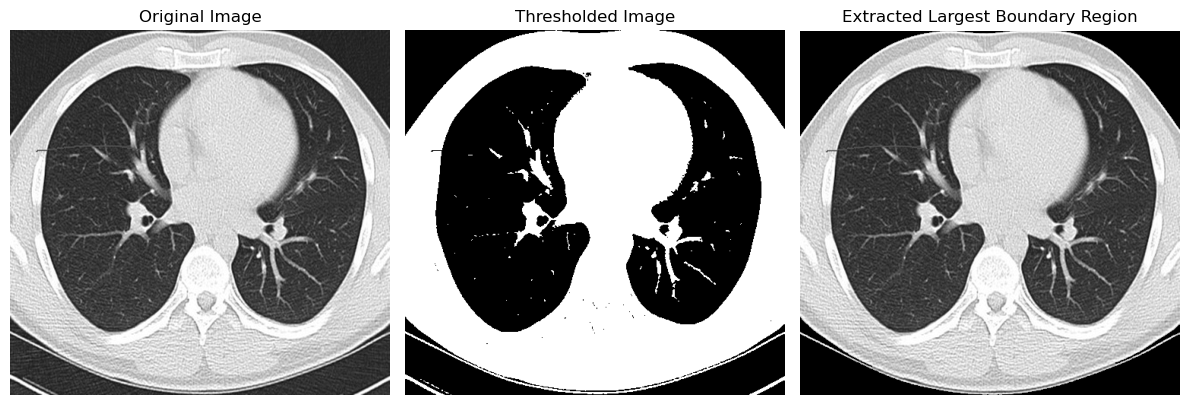

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = r"C:\Users\karth\min_max\Class 1  (48).bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded
if image is None:
    print("Error: Image not loaded. Check the file path!")
    exit()

# Compute the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Find the optimal threshold using Otsu's method
threshold_value, threshold_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours were found
if len(contours) == 0:
    print("No contours found!")
    exit()

# Find the largest contour (based on area)
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask for the largest contour
mask = np.zeros_like(image)
cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

# Extract only the region inside the contour
extracted_region = cv2.bitwise_and(image, image, mask=mask)

# Get bounding box around the contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the image to the bounding box
cropped_extracted_region = extracted_region[y:y+h, x:x+w]

# Display results
plt.figure(figsize=(12, 6))

# Show Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Show Monochrome Image
plt.subplot(1, 3, 2)
plt.imshow(threshold_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")

# Show Extracted Region
plt.subplot(1, 3, 3)
plt.imshow(cropped_extracted_region, cmap='gray')
plt.title("Extracted Largest Boundary Region")
plt.axis("off")

plt.tight_layout()
plt.show()


In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Input folder containing images
input_folder = r"min_maxcopy"

# Output folder to save extracted regions
extracted_folder = r"Extracted_Regions"

# Output folder to save monochrome images
monochrome_folder = r"Monochrome_Images"

# Create output folders if they don't exist
os.makedirs(extracted_folder, exist_ok=True)
os.makedirs(monochrome_folder, exist_ok=True)

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith((".bmp", ".jpg", ".png")):  # Check for image formats
        image_path = os.path.join(input_folder, filename)

        # Load image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Error loading image: {filename}")
            continue

        # Apply Otsu's thresholding
        _, threshold_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find contours
        contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours:
            print(f"No contours found in image: {filename}")
            continue

        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Create a mask for the largest contour
        mask = np.zeros_like(image)
        cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

        # Extract only the region inside the contour
        extracted_region = cv2.bitwise_and(image, image, mask=mask)

        # Get bounding box around the contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Crop the image to the bounding box
        cropped_extracted_region = extracted_region[y:y+h, x:x+w]

        # Apply Otsu's thresholding to extracted region (Convert to monochrome)
        _, extracted_binary = cv2.threshold(cropped_extracted_region, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Save the extracted region
        extracted_save_path = os.path.join(extracted_folder, f"extracted_{filename}")
        cv2.imwrite(extracted_save_path, cropped_extracted_region)

        # Save the monochrome image
        monochrome_save_path = os.path.join(monochrome_folder, f"monochrome_{filename}")
        cv2.imwrite(monochrome_save_path, extracted_binary)

        print(f"Processed: {filename} → Extracted: {extracted_save_path}, Monochrome: {monochrome_save_path}")

print("Batch processing complete! Extracted regions and monochrome images are saved.")


Processed: Class 1  (1).bmp → Extracted: Extracted_Regions\extracted_Class 1  (1).bmp, Monochrome: Monochrome_Images\monochrome_Class 1  (1).bmp
Processed: Class 1  (10).bmp → Extracted: Extracted_Regions\extracted_Class 1  (10).bmp, Monochrome: Monochrome_Images\monochrome_Class 1  (10).bmp
Processed: Class 1  (100).bmp → Extracted: Extracted_Regions\extracted_Class 1  (100).bmp, Monochrome: Monochrome_Images\monochrome_Class 1  (100).bmp
Processed: Class 1  (101).bmp → Extracted: Extracted_Regions\extracted_Class 1  (101).bmp, Monochrome: Monochrome_Images\monochrome_Class 1  (101).bmp
Processed: Class 1  (102).bmp → Extracted: Extracted_Regions\extracted_Class 1  (102).bmp, Monochrome: Monochrome_Images\monochrome_Class 1  (102).bmp
Processed: Class 1  (103).bmp → Extracted: Extracted_Regions\extracted_Class 1  (103).bmp, Monochrome: Monochrome_Images\monochrome_Class 1  (103).bmp
Processed: Class 1  (104).bmp → Extracted: Extracted_Regions\extracted_Class 1  (104).bmp, Monochrome: 

Processed: Class 1  (178).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (178).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (178).bmp
Processed: Class 1  (179).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (179).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (179).bmp
Processed: Class 1  (18).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (18).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (18).bmp
Processed: Class 1  (180).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (180).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (180).bmp
Processed: Class 1  (181).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (181).bmp, Mo

Processed: Class 1  (219).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (219).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (219).bmp
Processed: Class 1  (22).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (22).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (22).bmp
Processed: Class 1  (220).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (220).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (220).bmp
Processed: Class 1  (221).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (221).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (221).bmp
Processed: Class 1  (222).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (222).bmp, Mo

Processed: Class 1  (262).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (262).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (262).bmp
Processed: Class 1  (263).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (263).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (263).bmp
Processed: Class 1  (264).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (264).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (264).bmp
Processed: Class 1  (265).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (265).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (265).bmp
Processed: Class 1  (266).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (266).bmp,

Processed: Class 1  (30).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (30).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (30).bmp
Processed: Class 1  (300).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (300).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (300).bmp
Processed: Class 1  (301).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (301).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (301).bmp
Processed: Class 1  (302).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (302).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (302).bmp
Processed: Class 1  (303).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (303).bmp, Mo

Processed: Class 1  (6).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (6).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (6).bmp
Processed: Class 1  (60).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (60).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (60).bmp
Processed: Class 1  (61).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (61).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (61).bmp
Processed: Class 1  (62).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (62).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_Class 1  (62).bmp
Processed: Class 1  (63).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_Class 1  (63).bmp, Monochrome: C:\U

Processed: class 2 (1).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 2 (1).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 2 (1).bmp
Processed: class 2 (10).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 2 (10).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 2 (10).bmp
Processed: class 2 (11).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 2 (11).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 2 (11).bmp
Processed: class 2 (12).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 2 (12).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 2 (12).bmp
Processed: class 2 (13).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 2 (13).bmp, Monochrome: C:\Users\HP\Downlo

Processed: class 2 (49).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 2 (49).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 2 (49).bmp
Processed: class 2 (5).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 2 (5).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 2 (5).bmp
Processed: class 2 (50).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 2 (50).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 2 (50).bmp
Processed: class 2 (51).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 2 (51).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 2 (51).bmp
Processed: class 2 (52).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 2 (52).bmp, Monochrome: C:\Users\HP\Downlo

Processed: class 3 (111).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (111).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (111).bmp
Processed: class 3 (112).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (112).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (112).bmp
Processed: class 3 (113).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (113).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (113).bmp
Processed: class 3 (114).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (114).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (114).bmp
Processed: class 3 (115).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (115).bmp, Monochrome: C

Processed: class 3 (15).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (15).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (15).bmp
Processed: class 3 (150).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (150).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (150).bmp
Processed: class 3 (151).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (151).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (151).bmp
Processed: class 3 (152).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (152).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (152).bmp
Processed: class 3 (153).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (153).bmp, Monochrome: C:\U

Processed: class 3 (190).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (190).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (190).bmp
Processed: class 3 (191).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (191).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (191).bmp
Processed: class 3 (192).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (192).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (192).bmp
Processed: class 3 (193).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (193).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (193).bmp
Processed: class 3 (194).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (194).bmp, Monochrome: C

Processed: class 3 (6).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (6).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (6).bmp
Processed: class 3 (60).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (60).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (60).bmp
Processed: class 3 (61).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (61).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (61).bmp
Processed: class 3 (62).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (62).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (62).bmp
Processed: class 3 (63).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (63).bmp, Monochrome: C:\Users\HP\Downlo

Processed: class 3 (98).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (98).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (98).bmp
Processed: class 3 (99).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 3 (99).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 3 (99).bmp
Processed: class 4  (1).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (1).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 4  (1).bmp
Processed: class 4  (10).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (10).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 4  (10).bmp
Processed: class 4  (100).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (100).bmp, Monochrome: C:\Users

Processed: class 4  (30).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (30).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 4  (30).bmp
Processed: class 4  (31).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (31).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 4  (31).bmp
Processed: class 4  (32).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (32).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 4  (32).bmp
Processed: class 4  (33).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (33).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 4  (33).bmp
Processed: class 4  (34).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (34).bmp, Monochrome: C

Processed: class 4  (8).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (8).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 4  (8).bmp
Processed: class 4  (80).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (80).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 4  (80).bmp
Processed: class 4  (81).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (81).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 4  (81).bmp
Processed: class 4  (82).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (82).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 4  (82).bmp
Processed: class 4  (83).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 4  (83).bmp, Monochrome: C:\U

Processed: class 5 (121).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (121).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (121).bmp
Processed: class 5 (122).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (122).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (122).bmp
Processed: class 5 (123).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (123).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (123).bmp
Processed: class 5 (124).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (124).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (124).bmp
Processed: class 5 (125).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (125).bmp, Monochrome: C

Processed: class 5 (18).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (18).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (18).bmp
Processed: class 5 (19).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (19).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (19).bmp
Processed: class 5 (2).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (2).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (2).bmp
Processed: class 5 (20).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (20).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (20).bmp
Processed: class 5 (21).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (21).bmp, Monochrome: C:\Users\HP\Downlo

Processed: class 5 (55).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (55).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (55).bmp
Processed: class 5 (56).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (56).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (56).bmp
Processed: class 5 (57).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (57).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (57).bmp
Processed: class 5 (58).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (58).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (58).bmp
Processed: class 5 (59).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (59).bmp, Monochrome: C:\Users\HP\Dow

Processed: class 5 (92).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (92).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (92).bmp
Processed: class 5 (93).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (93).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (93).bmp
Processed: class 5 (94).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (94).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (94).bmp
Processed: class 5 (95).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (95).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 5 (95).bmp
Processed: class 5 (96).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 5 (96).bmp, Monochrome: C:\Users\HP\Dow

Processed: class 6 (127).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (127).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (127).bmp
Processed: class 6 (128).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (128).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (128).bmp
Processed: class 6 (129).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (129).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (129).bmp
Processed: class 6 (13).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (13).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (13).bmp
Processed: class 6 (130).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (130).bmp, Monochrome: C:\U

Processed: class 6 (166).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (166).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (166).bmp
Processed: class 6 (167).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (167).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (167).bmp
Processed: class 6 (168).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (168).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (168).bmp
Processed: class 6 (169).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (169).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (169).bmp
Processed: class 6 (17).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (17).bmp, Monochrome: C:\

Processed: class 6 (208).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (208).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (208).bmp
Processed: class 6 (209).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (209).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (209).bmp
Processed: class 6 (21).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (21).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (21).bmp
Processed: class 6 (210).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (210).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (210).bmp
Processed: class 6 (211).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (211).bmp, Monochrome: C:\U

Processed: class 6 (242).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (242).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (242).bmp
Processed: class 6 (243).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (243).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (243).bmp
Processed: class 6 (244).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (244).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (244).bmp
Processed: class 6 (245).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (245).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (245).bmp
Processed: class 6 (246).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (246).bmp, Monochrome: C

Processed: class 6 (283).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (283).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (283).bmp
Processed: class 6 (284).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (284).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (284).bmp
Processed: class 6 (285).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (285).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (285).bmp
Processed: class 6 (286).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (286).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (286).bmp
Processed: class 6 (287).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (287).bmp, Monochrome: C

Processed: class 6 (323).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (323).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (323).bmp
Processed: class 6 (324).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (324).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (324).bmp
Processed: class 6 (325).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (325).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (325).bmp
Processed: class 6 (326).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (326).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (326).bmp
Processed: class 6 (327).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (327).bmp, Monochrome: C

Processed: class 6 (367).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (367).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (367).bmp
Processed: class 6 (368).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (368).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (368).bmp
Processed: class 6 (369).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (369).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (369).bmp
Processed: class 6 (37).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (37).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (37).bmp
Processed: class 6 (370).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (370).bmp, Monochrome: C:\U

Processed: class 6 (408).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (408).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (408).bmp
Processed: class 6 (409).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (409).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (409).bmp
Processed: class 6 (41).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (41).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (41).bmp
Processed: class 6 (410).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (410).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (410).bmp
Processed: class 6 (411).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (411).bmp, Monochrome: C:\U

Processed: class 6 (447).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (447).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (447).bmp
Processed: class 6 (448).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (448).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (448).bmp
Processed: class 6 (449).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (449).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (449).bmp
Processed: class 6 (45).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (45).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (45).bmp
Processed: class 6 (450).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (450).bmp, Monochrome: C:\U

Processed: class 6 (75).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (75).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (75).bmp
Processed: class 6 (76).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (76).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (76).bmp
Processed: class 6 (77).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (77).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (77).bmp
Processed: class 6 (78).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (78).bmp, Monochrome: C:\Users\HP\Downloads\mainprojecr\Monochrome_Images\monochrome_class 6 (78).bmp
Processed: class 6 (79).bmp → Extracted: C:\Users\HP\Downloads\mainprojecr\Extracted_Regions\extracted_class 6 (79).bmp, Monochrome: C:\Users\HP\Dow

In [ ]:
################ feb 5 

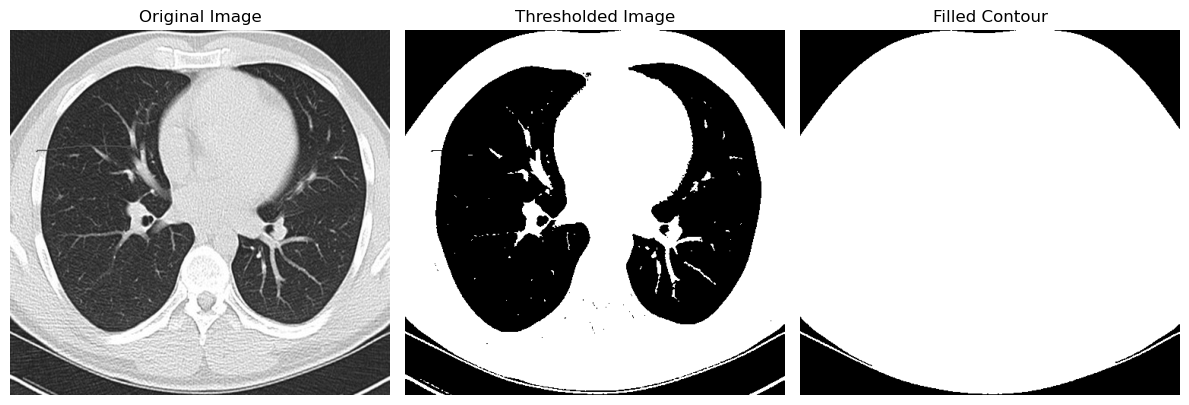

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = r"C:\Users\karth\min_max\Class 1  (48).bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if image is None:
    print("Error: Image not loaded. Check the file path!")
    exit()

# Compute histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Apply Otsu's thresholding
threshold_value, threshold_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours were found
if not contours:
    print("No contours found in the image!")
    exit()

# Find the largest contour (based on area)
largest_contour = max(contours, key=cv2.contourArea)

# Create a blank mask
filled_mask = np.zeros_like(image, dtype=np.uint8)

# Fill the largest contour with 1
cv2.drawContours(filled_mask, [largest_contour], -1, 1, thickness=cv2.FILLED)

# Display results
plt.figure(figsize=(12, 6))

# Show Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Show Monochrome Image
plt.subplot(1, 3, 2)
plt.imshow(threshold_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")

# Show Filled Contour Image
plt.subplot(1, 3, 3)
plt.imshow(filled_mask, cmap='gray')
plt.title("Filled Contour")
plt.axis("off")

plt.tight_layout()
plt.show()
